In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk(r'C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Lesion_Identification_Model_v1.h5
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtest\Acne and Rosacea Photos\07PerioralDermEye.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtest\Acne and Rosacea Photos\07Rhinophyma1.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtest\Acne and Rosacea Photos\07rhnophymas0321051.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtest\Acne and Rosacea Photos\07RosaceaFulFAce.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtest\Acne and Rosacea Photos\07RosaceaMilia0120.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtest\Acne and Rosacea Photos\07RosaceaOK0828063.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtest\Acne and Ro

C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtrain\Vasculitis Photos\erythema-multiforme-80.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtrain\Vasculitis Photos\erythema-multiforme-81.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtrain\Vasculitis Photos\erythema-multiforme-82.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtrain\Vasculitis Photos\erythema-multiforme-83.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtrain\Vasculitis Photos\granuloma-faciale-1.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtrain\Vasculitis Photos\granuloma-faciale-3.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtrain\Vasculitis Photos\granuloma-faciale-4.jpg
C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtrai

In [2]:
!pip install --upgrade "tensorflow"

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import tensorflow as tf

print(tf.__version__)

2.16.1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling

In [5]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtrain',  # Path to training data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\fouzi\Downloads\Lesions Dataset-20240212T051157Z-001\Lesions Dataset\Newtest',  # Path to testing data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 2609 images belonging to 19 classes.
Found 895 images belonging to 19 classes.


In [6]:
path = r'C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtrain/'

In [7]:
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (192, 192, 3)


print('classes: ', class_names)

classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [8]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 655.4 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 774.0 kB/s eta 0:00:50
   ---------------------------------------- 0.2/38.6 MB 981.9 kB/s eta 0:00:40
   ---------------------------------------- 0.3/38.6 MB 1.0 MB/s eta 0:00:39
   ---------------------------------------- 0.3/38.6 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.4/38.6 MB 1.1 MB/s eta 0:00:37
   --------------------

In [9]:
import cv2

labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])#That line remove Blue
        
        #image = np.asarray(cv2.resize(cv2.imread(data_path + cl + '/' + img, cv2.COLOR_BGR2RGB), img_size[0:2]))
        images.append(image)
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

images:

Acne and Rosacea Photos -> done
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions -> done
Atopic Dermatitis Photos -> done
Cellulitis Impetigo and other Bacterial Infections -> done
Eczema Photos -> done
Exanthems and Drug Eruptions -> done
Herpes HPV and other STDs Photos -> done
Light Diseases and Disorders of Pigmentation -> done
Lupus and other Connective Tissue diseases -> done
Melanoma Skin Cancer Nevi and Moles -> done
Poison Ivy Photos and other Contact Dermatitis -> done
Psoriasis pictures Lichen Planus and related diseases -> done
Seborrheic Keratoses and other Benign Tumors -> done
Systemic Disease -> done
Tinea Ringworm Candidiasis and other Fungal Infections -> done
Urticaria Hives -> done
Vascular Tumors -> done
Vasculitis Photos -> done
Warts Molluscum and other Viral Infections -> done


labels shape: (2609, 19)
images shape: (2609, 192, 192, 3)


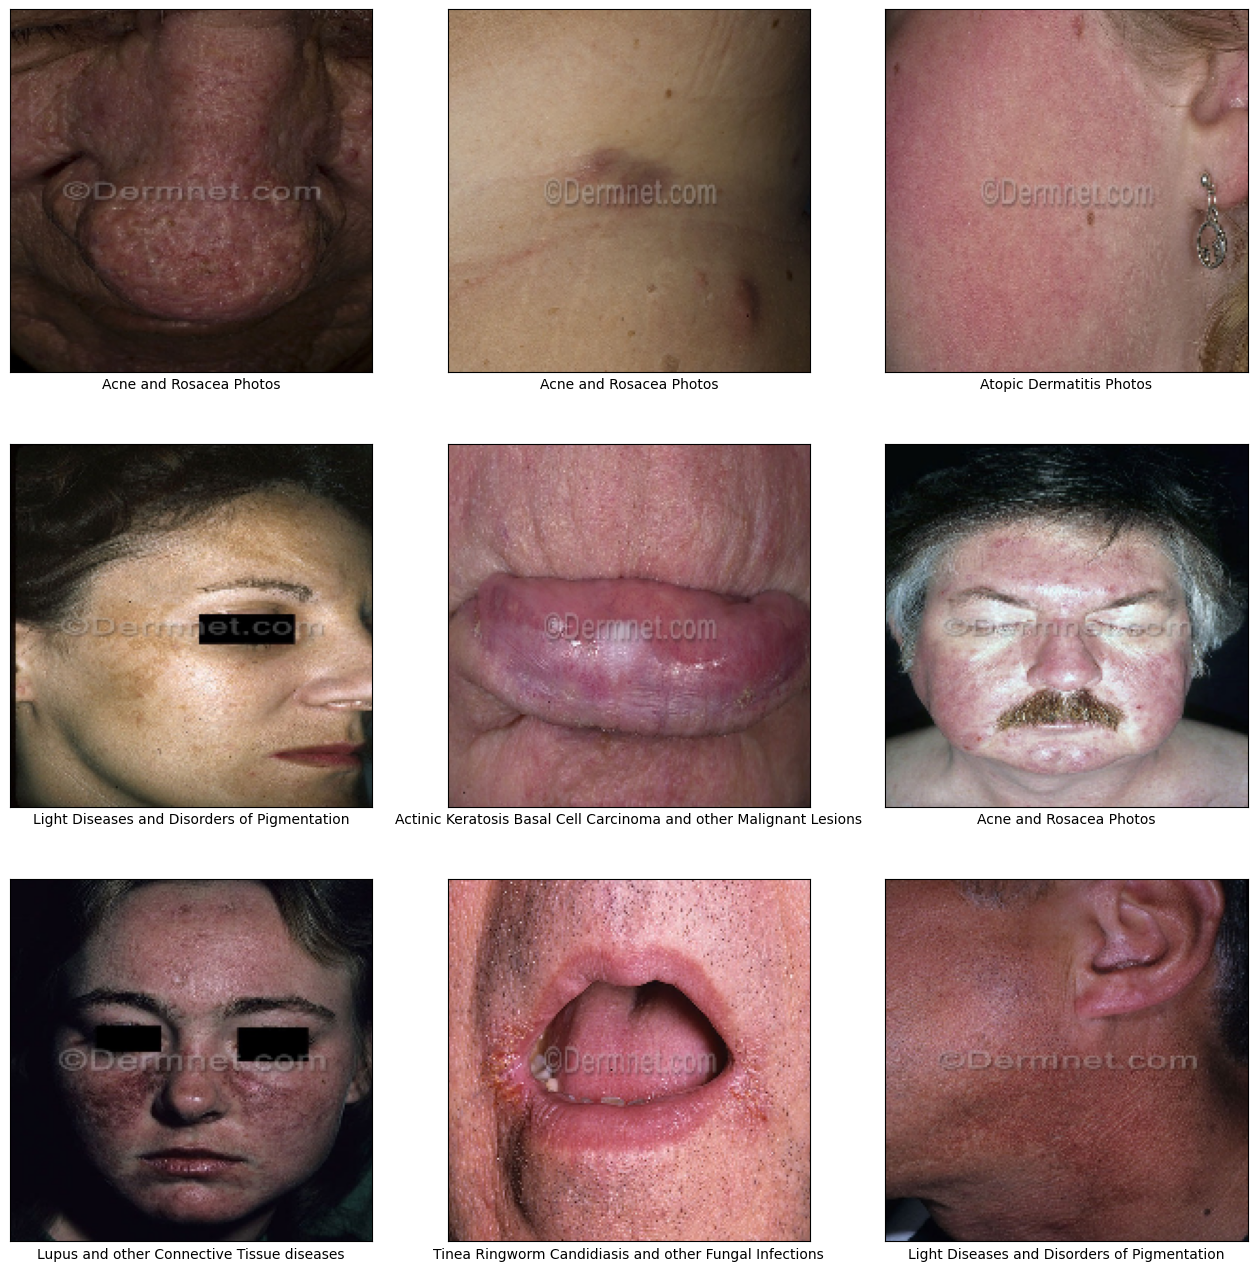

In [10]:
from random import randint

fig, axs = plt.subplots(3, 3, figsize=(16, 16))#Original was 10,6

for x in range(3):
    for y in range(3):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
                    
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
        
plt.show()

In [11]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (2217, 192, 192, 3)
train labels shape: (2217, 19)

validation images shape: (392, 192, 192, 3)
validation labels shape: (392, 19)



In [1]:
import tensorflow as tf

cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

NameError: name 'img_size' is not defined

In [13]:
history = cnn_model.fit(images, labels, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1363s 17s/step - accuracy: 0.2624 - loss: 2.5526 - val_accuracy: 0.3265 - val_loss: 2.4019
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 933s 11s/step - accuracy: 0.3216 - loss: 2.3463 - val_accuracy: 0.3291 - val_loss: 2.3838
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 943s 11s/step - accuracy: 0.3266 - loss: 2.2841 - val_accuracy: 0.3393 - val_loss: 2.2990
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 945s 12s/step - accuracy: 0.3196 - loss: 2.2720 - val_accuracy: 0.3291 - val_loss: 2.2374
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 945s 12s/step - accuracy: 0.3374 - loss: 2.1642 - val_accuracy: 0.3597 - val_loss: 2.1479
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 940s 11s/step - accuracy: 0.3566 - loss: 2.1084 - val_accuracy: 0.3852 - val_loss: 2.0361
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 944s 12s/step - accuracy: 0.4012 - loss: 1.9828 - val_accuracy: 0.4770 - val_loss: 1.8070
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 946s 12s/step - accuracy: 0.4891 - loss: 1.6880 - val_accuracy: 0

In [14]:
cnn_model.save('Lesion_Identification_Model_v1.keras')


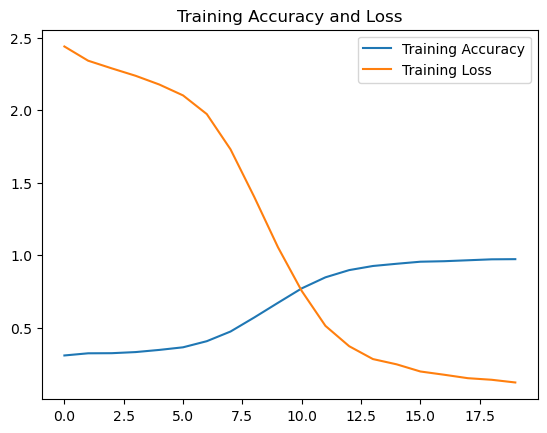

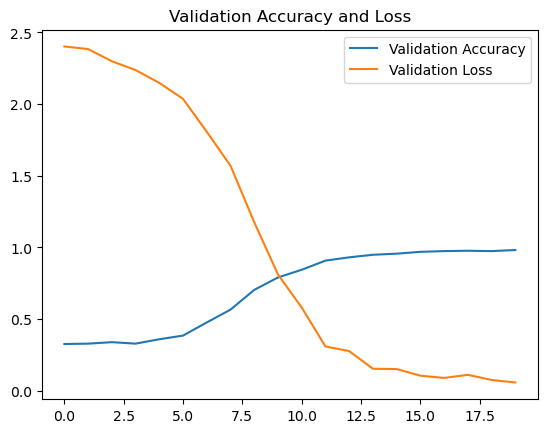

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

In [34]:
path_test = r'C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/'
class_names_test = sorted(os.listdir(path_test))
num_classes_test = len(class_names_test)

img_test_size = (192, 192, 3)


print('classes: ', class_names_test)

classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [35]:
import cv2

In [37]:
labels_t = []
images_t = []

print('images:\n')
for clt in class_names_test:
    print(clt, end=' -> ')
    for img in os.listdir(path_test + clt):
        label = np.zeros(num_classes_test)
        label[class_names_test.index(clt)] = 1
        labels_t.append(label)
        
        image_path = os.path.join(path_test, clt, img)
        print("Reading image:", image_path)  # Debug print
        
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image is None:
            print(f"Failed to read image: {image_path}")
            continue
        
        resized_image = cv2.resize(image, img_size[0:2])
        resized_image = resized_image[:, :, ::-1]  # Convert BGR to RGB
        images_t.append(resized_image)
    print('done')

labels_t = np.asarray(labels_t)
images_t = np.asarray(images_t)

print(f'\n\nlabels shape: {labels_t.shape}')
print(f'images shape: {images_t.shape}'

images:

Acne and Rosacea Photos -> Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\07PerioralDermEye.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\07Rhinophyma1.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\07rhnophymas0321051.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\07RosaceaFulFAce.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\07RosaceaMilia0120.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\07RosaceaOK0828063.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesion

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\acne-open-comedo-18.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\acne-open-comedo-24.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\acne-open-comedo-26.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\acne-open-comedo-27.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\acne-open-comedo-37.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\acne-open-comedo-48.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne 

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\perioral-dermatitis-42.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\perioral-dermatitis-45.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\perioral-dermatitis-50.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\perioral-dermatitis-57.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\perioral-dermatitis-59.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\perioral-dermatitis-83.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dat

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\rosacea-nose-6.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\rosacea-nose-61.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\rosacea-nose-65.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\rosacea-nose-66.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\rosacea-nose-7.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\rosacea-steroid-1.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Acne and Rosacea Photos\rosac

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-cell-carcinoma-face-22.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-cell-carcinoma-face-26.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-cell-carcinoma-face-27.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-cell-carcinoma-face-29.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-cell-carcinoma-face-30

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-cell-carcinoma-pigmented-19.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-cell-carcinoma-pigmented-21.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-cell-carcinoma-pigmented-28.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-cell-carcinoma-pigmented-31.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions\basal-ce

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Atopic Dermatitis Photos\4th1IMG008.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Atopic Dermatitis Photos\4th1IMG013.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Atopic Dermatitis Photos\5IMG007.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Atopic Dermatitis Photos\7IMG004.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Atopic Dermatitis Photos\9IMG008.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Atopic Dermatitis Photos\9IMG013.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Atopic Dermatitis Photos\Acne and Rosacea Photos
Failed to read i

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Light Diseases and Disorders of Pigmentation\phototoxic-reactions-doxycycline-3.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Light Diseases and Disorders of Pigmentation\porphyrias-7.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Light Diseases and Disorders of Pigmentation\porphyrias-8.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Light Diseases and Disorders of Pigmentation\sun-damaged-skin-102.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Light Diseases and Disorders of Pigmentation\sun-damaged-skin-107.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Light Diseases and Disorders of Pigmentation\s

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Poison Ivy Photos and other Contact Dermatitis\allergic-contact-dermatitis-167.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Poison Ivy Photos and other Contact Dermatitis\allergic-contact-dermatitis-17.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Poison Ivy Photos and other Contact Dermatitis\allergic-contact-dermatitis-25.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Poison Ivy Photos and other Contact Dermatitis\allergic-contact-dermatitis-31.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Poison Ivy Photos and other Contact Dermatitis\allergic-contact-dermatitis-38.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Seborrheic Keratoses and other Benign Tumors\sebaceous-hyperplasia-90.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Seborrheic Keratoses and other Benign Tumors\sebaceous-hyperplasia-96.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Seborrheic Keratoses and other Benign Tumors\skin-tags-polyps-16.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Seborrheic Keratoses and other Benign Tumors\skin-tags-polyps-43.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Seborrheic Keratoses and other Benign Tumors\skin-tags-polyps-76.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Seborrheic Keratoses and other Benign T

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Tinea Ringworm Candidiasis and other Fungal Infections\tinea-beard-2.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Tinea Ringworm Candidiasis and other Fungal Infections\tinea-beard-3.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Tinea Ringworm Candidiasis and other Fungal Infections\tinea-beard-6.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Tinea Ringworm Candidiasis and other Fungal Infections\tinea-face-1.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Tinea Ringworm Candidiasis and other Fungal Infections\tinea-face-10(1).jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Tinea Ringworm Candidiasis 

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Vascular Tumors\venous-lake-28.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Vascular Tumors\venous-lake-29.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Vascular Tumors\venous-lake-8.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Vascular Tumors\venous-malformations-1.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Vascular Tumors\venous-malformations-43.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Vascular Tumors\venous-malformations-49.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Vascular Tumors\venous-malformations-58.jpg
Reading image:

Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Warts Molluscum and other Viral Infections\molluscum-contagiosum-98.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Warts Molluscum and other Viral Infections\varicella-12.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Warts Molluscum and other Viral Infections\warts-14.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Warts Molluscum and other Viral Infections\warts-21.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Warts Molluscum and other Viral Infections\warts-26.jpg
Reading image: C:/Users/fouzi/Downloads/Lesions Dataset-20240212T051157Z-001/Lesions Dataset/Newtest/Warts Molluscum and other Viral Infections\warts-27.jpg
Reading image: C:/Users/fouzi/Download

In [2]:
predictions = cnn_model.predict(images_t)
x=np.argmax(predictions,axis=1)


NameError: name 'images_t' is not defined

In [43]:
print(predictions)
print(x)

[[9.9899262e-01 2.0548970e-07 4.2003950e-10 ... 4.8956116e-07
  3.3482099e-09 4.6233516e-04]
 [9.3804467e-01 2.7322004e-02 1.2911958e-12 ... 6.5255404e-07
  1.5755751e-14 2.5855226e-04]
 [9.7831500e-01 2.1467181e-02 8.8576908e-06 ... 2.8754929e-08
  5.4463621e-11 2.8892346e-06]
 ...
 [9.0030801e-01 2.2521408e-04 3.1545900e-13 ... 8.7537141e-05
  1.1387416e-10 3.4500413e-08]
 [3.2972932e-02 4.8894965e-04 1.2531764e-07 ... 1.0437393e-05
  2.5145135e-05 4.7352660e-01]
 [7.0077367e-03 4.5794748e-13 1.1396470e-18 ... 2.2300356e-10
  9.1457096e-08 2.1009802e-05]]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  7  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0
  0  0 10  0  0  0  0 18  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  

In [53]:

single_labels_t = []

for label in labels_t:
    single_label_index = np.argmax(label)
    single_labels_t.append(single_label_index)


single_labels_t = np.array(single_labels_t)


print(single_labels_t)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1